In [1]:
# load TensorBoard
% load_ext tensorboard

# imports
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.datasets.mnist import load_data
from ai_library import CustomData, NeuralNet, Visualisation

In [2]:
# new child class to load and preprocess MNIST handwritten digits dataset
class MNISTdata(CustomData):
    def __init__(self):
        super(MNISTdata, self).__init__()

    def load_mnist(self):
        return load_data()

In [3]:
# parameters
EPOCHS = 30
BATCH_SIZE = 128

In [4]:
# load MNIST data
data_gen = MNISTdata()
(x_train, y_train), (x_test, y_test) = data_gen.load_mnist()

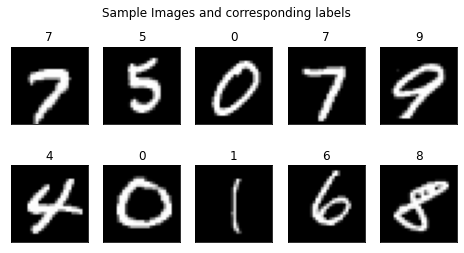

In [5]:
# show images
viz = Visualisation()
viz.img_plot("Sample Images and corresponding labels", x_train, y_train)

In [6]:
# preprocessing
x_train, y_train, labels_train = data_gen.preprocessing(x_train, y_train)
x_test, y_test, labels_test = data_gen.preprocessing(x_test, y_test)

# input shape and number of classes
inp_shape = x_train.shape
num_classes = len(labels_train)

In [7]:
# initialize model
model = NeuralNet(num_classes)

In [8]:
# Callbacks
# early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=2)
# tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stopping, tensorboard_cb]

In [9]:
# train model
history = model.comp_and_fit(x_train, y_train, EPOCHS, BATCH_SIZE, callbacks)

Epoch 1/30
375/375 - 40s - loss: 0.2449 - accuracy: 0.9214 - val_loss: 0.0590 - val_accuracy: 0.9820
Epoch 2/30
375/375 - 38s - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0467 - val_accuracy: 0.9847
Epoch 3/30
375/375 - 38s - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0353 - val_accuracy: 0.9894
Epoch 4/30
375/375 - 38s - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 5/30
375/375 - 38s - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 6/30
375/375 - 38s - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0303 - val_accuracy: 0.9923
Epoch 7/30
375/375 - 38s - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0291 - val_accuracy: 0.9918
Epoch 8/30
375/375 - 38s - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 9/30
375/375 - 38s - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.0330 - val_accuracy: 0.9903
Epoch 10/30
375/375 - 38s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0322 - val_accura

In [13]:
%tensorboard --logdir logs

Launching TensorBoard...

In [12]:
# model evaluation
loss, accuracy = model.test_eval(x_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 99.21 %


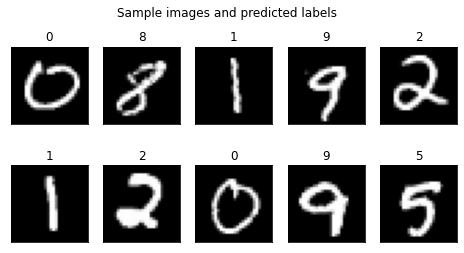

In [20]:
# predictions
y_preds = model.test_pred(x_test)
viz.img_plot("Sample images and predicted labels", x_test, y_preds)

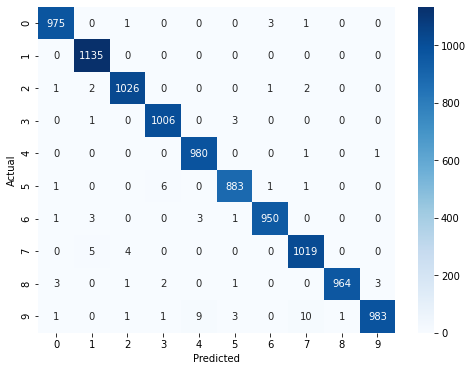

In [21]:
# confusion matrix
viz.cm_plot(y_test, y_preds, labels_test)